In [2]:
using CSV 
using DataFrames 

using Plots 
using Statistics 
using StatsPlots

In [3]:
"""
Goal: predict dividends and horse placings in a race


"""

"Goal: predict dividends and horse placings in a race\n\n\n"

In [220]:
races = CSV.read("races.csv")
runs = CSV.read("runs.csv")


,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country
,Int64,Int64,Int64,Int64,Float64,Float64,Int64,String?
1,0,1,3917,10,0.0,8.0,3,AUS
2,0,2,2157,8,0.0,5.75,3,NZ
3,0,3,858,7,0.0,4.75,3,NZ
4,0,4,1853,9,0.0,6.25,3,SAF
5,0,5,2796,6,0.0,3.75,3,GB
6,0,6,3296,3,0.0,1.25,3,NZ
7,0,7,911,12,0.0,9.5,3,NZ
8,0,8,2170,1,1.0,0.0,3,AUS
9,0,9,1730,13,0.0,9.75,3,NZ


In [221]:
print(size(runs), size(races))

(79447, 37)(6349, 37)

In [222]:
function summary_stats(arr)
    clean_arr = skipmissing(arr)
    print("missing: $(mean(ismissing.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats (generic function with 1 method)

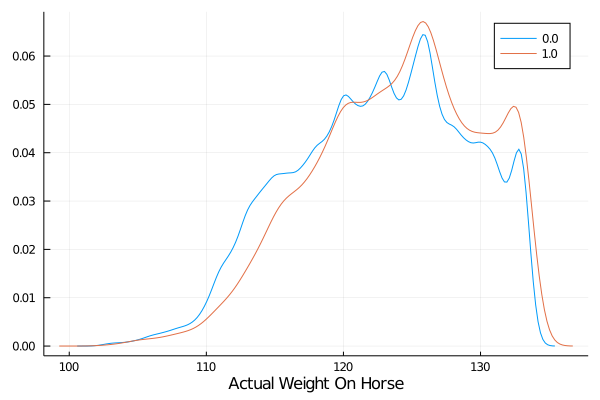

In [223]:
density(runs[:actual_weight], group=runs[:won])
xlabel!("Actual Weight On Horse")

In [224]:
temp_hist = by(runs, :horse_type, nrow )
temp_hist

,horse_type,nrow
,String?,Int64
1,Gelding,75503
2,Mare,238
3,Horse,1093
4,Brown,2044
5,Rig,154
6,Colt,305
7,missing,2
8,Roan,48
9,Filly,43


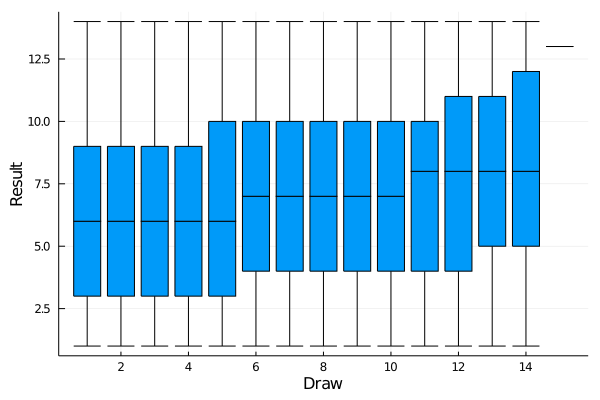

In [225]:
boxplot(runs[:draw], runs[:result], label="")
xlabel!("Draw")
ylabel!("Result")

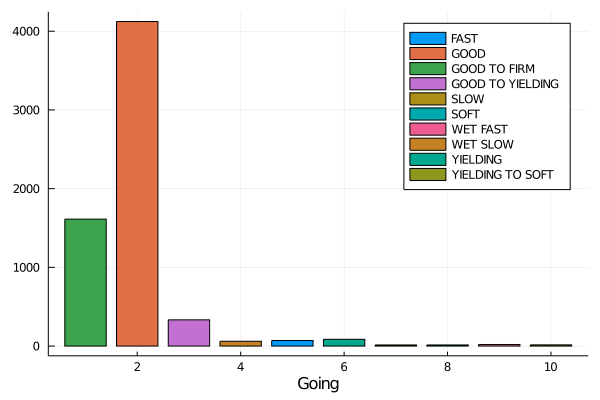

In [226]:
temp_hist = by(races, :going, nrow )
dropmissing!(temp_hist)
bar(temp_hist[:nrow], group=temp_hist[:going])
xlabel!("Going")

In [227]:
# Inner join to get full dataset 
select!(races, Not(:time1))
select!(races, Not(:time2))
select!(races, Not(:time3))
select!(races, Not(:time4))
select!(races, Not(:time5))
select!(races, Not(:time6))
select!(races, Not(:time7))


full_data = innerjoin(races, runs, on =:race_id)

print(size(full_data))
showall(head(full_data))

(79447, 66)6×66 DataFrame
│ Row │ race_id │ date       │ venue  │ race_no │ config │ surface │ distance │
│     │ Int64   │ Date       │ String │ Int64   │ String │ Int64   │ Int64    │
├─────┼─────────┼────────────┼────────┼─────────┼────────┼─────────┼──────────┤
│ 1   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 2   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 3   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 4   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 5   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │
│ 6   │ 0       │ 1997-06-02 │ ST     │ 1       │ A      │ 0       │ 1400     │

│ Row │ going        │ horse_ratings │ prize    │ race_class │ sec_time1 │
│     │ String       │ String        │ Float64? │ Int64      │ Float64   │
├─────┼──────────────┼───────────────┼──────────┼────────────┼───────────┤
│ 1   │ GOOD TO FIRM │ 40-15

│ 4   │ missing       │ missing       │ 3.5         │ 5.0         │
│ 5   │ missing       │ missing       │ 7.75        │ 8.75        │
│ 6   │ missing       │ missing       │ 5.0         │ 7.75        │

│ Row │ behind_sec3 │ behind_sec4 │ behind_sec5 │ behind_sec6 │ time1   │
│     │ Float64     │ Float64?    │ Float64?    │ Float64?    │ Float64 │
├─────┼─────────────┼─────────────┼─────────────┼─────────────┼─────────┤
│ 1   │ 1.5         │ 8.0         │ missing     │ missing     │ 13.85   │
│ 2   │ 5.0         │ 5.75        │ missing     │ missing     │ 14.57   │
│ 3   │ 0.75        │ 4.75        │ missing     │ missing     │ 13.69   │
│ 4   │ 3.5         │ 6.25        │ missing     │ missing     │ 14.09   │
│ 5   │ 4.25        │ 3.75        │ missing     │ missing     │ 14.77   │
│ 6   │ 1.25        │ 1.25        │ missing     │ missing     │ 14.33   │

│ Row │ time2   │ time3   │ time4    │ time5    │ time6    │ finish_time │
│     │ Float64 │ Float64 │ Float64? │ Float64? │ Flo

In [228]:

# Getting the columns in our dataset that have atleast one missing entry 

cols_missing = colwise(x -> any(ismissing.(x)), full_data)
cols_with_missing = []
for i=1:66
    if cols_missing[i] > 0 
        append!(cols_with_missing, i)
    end
end

names_list = names(full_data)
col_names_missing =[]
for i in cols_with_missing
    push!(col_names_missing, String(names_list[i]))
end

print(x for x in col_names_missing)

Base.Generator{Array{Any,1},typeof(identity)}(identity, Any["prize", "sec_time4", "sec_time5", "sec_time6", "sec_time7", "place_combination3", "place_combination4", "place_dividend3", "place_dividend4", "win_combination2", "win_dividend2", "horse_country", "horse_type", "position_sec4", "position_sec5", "position_sec6", "behind_sec4", "behind_sec5", "behind_sec6", "time4", "time5", "time6", "place_odds"])

In [229]:
# Now we need to address these missing values 
# Lets look out percent of missing in each column.

for name in col_names_missing 
    try summary_stats(full_data[name])
    catch
        print("***************************")
        print("Empty array")
        print("***************************")
        print("\n")
    end
    
end

missing: 0.07362140798268028%
maximum: 2.5e7
minimum: 485000.0
median:  800000.0
mean:    1.117460528818718e6
std:     1.7347670152607828e6
missing: 0.4181529824914723%
maximum: 28.92
minimum: 21.4
median:  23.76
mean:    23.841666161899663
std:     0.801872692835738
missing: 0.8731355494858207%
maximum: 26.5
minimum: 21.81
median:  23.83
mean:    23.87469887885699
std:     0.7450271642038292
missing: 0.9836872380329025%
maximum: 25.92
minimum: 21.77
median:  24.03
mean:    23.934236111111105
std:     0.6605929498312835
missing: 1.0%
***************************Empty array***************************
missing: 0.001762181076692638%
maximum: 14.0
minimum: 1.0
median:  6.0
mean:    6.583983759315067
std:     3.7615102585466706
missing: 0.9963371807620175%
maximum: 14.0
minimum: 4.0
median:  8.0
mean:    8.391752577319588
std:     2.914494222511631
missing: 0.001762181076692638%
maximum: 420.5
minimum: 10.1
median:  27.5
mean:    39.460330109574365
std:     37.759506524122656
missing: 0.9963

In [230]:
"""
We are deleting the following columns: 
    horse_gear
    sec_time1
    sec_time2
    sec_time3
    sec_time4
    sec_time5
    sec_time6
    sec_time7
    time1
    time2
    time3
    time4
    time5
    time6
    time7
    
    Since we joined on races.csv with runs.csv we have the results of all the places for each horse. Thus these columns 
    are repetitve since we have the 'results' column. 
    place_combination1 
    place_combination2
    place_combination3
    place_combination4 

    1
    2
    3
    place_dividend4 -> 99% missing 

    win_combination1 -> exactly same column as place_combination1
    win_combination2 -> 99% missing 
    
    win_dividend2 -> 99% missing 

    position_sec1
    position_sec2
    position_sec3
    position_sec4
    position_sec5
    position_sec6
    
    behind_sec1
    behind_sec2
    behind_sec3
    behind_sec4
    behind_sec5
    behind_sec6

    place_odds 
    
    won
    lengths_behind

    finish_time
"""

select!(full_data, Not(:horse_id))

select!(full_data, Not(:horse_gear))
select!(full_data, Not(:sec_time1))
select!(full_data, Not(:sec_time2))
select!(full_data, Not(:sec_time3))
select!(full_data, Not(:sec_time4))
select!(full_data, Not(:sec_time5))
select!(full_data, Not(:sec_time6))
select!(full_data, Not(:sec_time7))

select!(full_data, Not(:time1))
select!(full_data, Not(:time2))
select!(full_data, Not(:time3))
select!(full_data, Not(:time4))
select!(full_data, Not(:time5))
select!(full_data, Not(:time6))
                            
select!(full_data, Not(:place_combination1))
select!(full_data, Not(:place_combination2))
select!(full_data, Not(:place_combination3))
select!(full_data, Not(:place_combination4))


select!(full_data, Not(:place_dividend1))
select!(full_data, Not(:place_dividend2))
select!(full_data, Not(:place_dividend3))
select!(full_data, Not(:place_dividend4))

select!(full_data, Not(:win_combination1))   
select!(full_data, Not(:win_combination2))

select!(full_data, Not(:win_dividend2))

select!(full_data, Not(:place_odds))

select!(full_data, Not(:position_sec1))
select!(full_data, Not(:position_sec2))
select!(full_data, Not(:position_sec3))
select!(full_data, Not(:position_sec4))
select!(full_data, Not(:position_sec5))
select!(full_data, Not(:position_sec6))


select!(full_data, Not(:behind_sec1))
select!(full_data, Not(:behind_sec2))
select!(full_data, Not(:behind_sec3))
select!(full_data, Not(:behind_sec4))
select!(full_data, Not(:behind_sec5))
select!(full_data, Not(:behind_sec6))


select!(full_data, Not(:result))
# select!(full_data, Not(:won))
select!(full_data, Not(:lengths_behind))
select!(full_data, Not(:finish_time))

select!(full_data, Not(:win_odds))        
                            
                                            


,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings
,Int64,Date,String,Int64,String,Int64,Int64,String,String
1,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
2,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
3,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
4,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
5,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
6,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
7,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
8,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
9,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15


In [231]:
select!(full_data, Not(:race_id))

,date,venue,race_no,config,surface,distance,going,horse_ratings
,Date,String,Int64,String,Int64,Int64,String,String
1,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
2,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
3,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
4,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
5,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
6,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
7,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
8,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
9,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15


In [232]:
"""
We are replacing missing values with the column mean for the following columns:
    prize


Deleting the missing rows from these columns: 
    place_dividend3 -> since there are only a handful missing (0.1% missing)
    
    horse_country -> missing extremely few (0.000025%) missing -> 2 rows! 

    horse_type -> same two rows missing as horse_country that will be deleted 

"""

# rip on julia here cause we found a bug 
temp_prize = DataFrame(hcat(full_data[:prize], full_data[:horse_type]))
dropmissing!(temp_prize, :x1)
temp_mean = mean(temp_prize[:x1])

full_data.prize = coalesce.(full_data.prize, temp_mean)


# dropping  missing values from place_dividend3 only a handful of rows
# dropmissing!(full_data, :place_dividend3)
dropmissing!(full_data, :horse_country)

dropmissing!(full_data, :horse_type)



# *****************************
# Huge bug 
# *************************
# replacing missing values with the column mean for prize

#coalesce.(full_data, mean(full_data[:prize]))
# select!(full_data, Not(:prize))
# full_data = hcat(full_data, prize_temp)







,date,venue,race_no,config,surface,distance,going,horse_ratings
,Date,String,Int64,String,Int64,Int64,String,String
1,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
2,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
3,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
4,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
5,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
6,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
7,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
8,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15
9,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15


In [233]:
"""
For our date column we will convert the Date object to a day of the year (int) to account for seasonality.
"""

using Dates
N = 79445
dayofyear = []
for i=1:N
    append!(dayofyear, Dates.dayofyear(full_data[i, :date]))
end



full_data = hcat(dayofyear, full_data)
select!(full_data, Not(:date))

,x1,venue,race_no,config,surface,distance,going,horse_ratings,prize
,Any,String,Int64,String,Int64,Int64,String,String,Float64
1,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
2,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
3,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
4,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
5,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
6,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
7,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
8,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0
9,153,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0


In [234]:
"""
For categorical features we will be doing one-hot encoding over many hot encoding because we do not have any sets.

"""
one_hot_labels = [
  :horse_type,
  :horse_country,
  :config,
  :venue,
  :going, 
  :horse_ratings,
  :jockey_id,
  :trainer_id
]

#Sets of all categories in a particular column
uniq_sets = [unique(full_data[:, label]) for label in one_hot_labels]


"Computes a onehot vector for every entry in column given a set of categories cats"
function onehot(column, cats=unique(column))
    result = zeros(length(column), length(cats))
 
    for r in 1:length(column)
        for c in 1:length(cats)
            
            if column[r] == cats[c] 
                result[r, c] = 1
            
            end
        end
    end
   
    result
end


onehot

In [235]:
htype = onehot(full_data[:, :horse_type], uniq_sets[1])
hcountry = onehot(full_data[:, :horse_country], uniq_sets[2])
config = onehot(full_data[:, :config], uniq_sets[3])
venue = onehot(full_data[:, :venue], uniq_sets[4])
going = onehot(full_data[:, :going], uniq_sets[5])
horse_ratings = onehot(full_data[:, :horse_ratings], uniq_sets[6])
jockey_id = onehot(full_data[:, :jockey_id], uniq_sets[7])
trainer_id = onehot(full_data[:, :trainer_id], uniq_sets[8])

one_hots = hcat(htype, hcountry, config, venue, going, horse_ratings, jockey_id, trainer_id)

79445×436 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  

In [236]:
select!(full_data, Not(:horse_type))
select!(full_data, Not(:horse_country))
select!(full_data, Not(:venue))
select!(full_data, Not(:config))
select!(full_data, Not(:going))
select!(full_data, Not(:horse_ratings))
select!(full_data, Not(:jockey_id))
select!(full_data, Not(:trainer_id))

,x1,race_no,surface,distance,prize,race_class,win_dividend1,horse_no
,Any,Int64,Int64,Int64,Float64,Int64,Float64,Int64
1,153,1,0,1400,485000.0,5,121.0,1
2,153,1,0,1400,485000.0,5,121.0,2
3,153,1,0,1400,485000.0,5,121.0,3
4,153,1,0,1400,485000.0,5,121.0,4
5,153,1,0,1400,485000.0,5,121.0,5
6,153,1,0,1400,485000.0,5,121.0,6
7,153,1,0,1400,485000.0,5,121.0,7
8,153,1,0,1400,485000.0,5,121.0,8
9,153,1,0,1400,485000.0,5,121.0,9


In [237]:

final_full_data = hcat(full_data, DataFrame(one_hots), makeunique=true)


,x1,race_no,surface,distance,prize,race_class,win_dividend1,horse_no
,Any,Int64,Int64,Int64,Float64,Int64,Float64,Int64
1,153,1,0,1400,485000.0,5,121.0,1
2,153,1,0,1400,485000.0,5,121.0,2
3,153,1,0,1400,485000.0,5,121.0,3
4,153,1,0,1400,485000.0,5,121.0,4
5,153,1,0,1400,485000.0,5,121.0,5
6,153,1,0,1400,485000.0,5,121.0,6
7,153,1,0,1400,485000.0,5,121.0,7
8,153,1,0,1400,485000.0,5,121.0,8
9,153,1,0,1400,485000.0,5,121.0,9


In [238]:
summary_stats(full_data[:prize])

missing: 0.0%
maximum: 2.5e7
minimum: 485000.0
median:  850000.0
mean:    1.1174729263397404e6
std:     1.6697066808360922e6


In [218]:
using Random

In [219]:

"""
Now we will begin fitting models to our dataset.

Because of the nature of our problem, we will have 2 separate models, per distance dataset, one predicting the win_dividends 
and one predicting and one result.


We start by isolating our y vector and splitting our dataset into train and test sets.
"""

# starting with the 1000 distance 
# First model predicting result


# Shuffling the dataset out of order 
final_full_data = final_full_data[shuffle(1:end), :]

train_proportion = 0.8
n = size(final_full_data, 1)


println("Size of dataset: ", string(n))

ntrain = convert(Int, round(train_proportion*n))


target = final_full_data[:result]
select!(final_full_data, Not(:win_dividend1))
X = convert(Matrix, select!(final_full_data, Not(:result)))
for i=1:89
     X[:, i] = [convert(Float64, X[k, i]) for k=1:79445]
end
X = convert(Array{Float64}, X)

train_x = X[1:ntrain, :]
test_x = X[ntrain+1:end, :]
train_y = target[1:ntrain, :]
test_y = target[ntrain+1:end, :]


train_x = hcat(train_x, ones(ntrain))
test_x = hcat(test_x, ones(n-ntrain))

train_y = [convert(Float64, train_y[i]) for i in train_y]
test_y = [convert(Float64, test_y[i]) for i in test_y]


Size of dataset: 79445


LoadError: ArgumentError: column name :result not found in the data frame

In [132]:
# Creating w
w = train_x\train_y

train_pred = train_x*w
test_pred = test_x*w


function MSE(y, pred)
    #finish function
    mse = []
    for (y, y_hat) in zip(y, pred)
        append!(mse, (y - y_hat)^2)
    end
    sum_mse = sum(mse)/length(mse)
end


train_MSE = MSE(train_y, train_pred)
test_MSE = MSE(test_y, test_pred)

println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

Train MSE	0.07053444768471186
Test MSE 	0.07415229555593991


In [239]:
final_full_data = final_full_data[shuffle(1:end), :]

train_proportion = 0.8
n = size(final_full_data, 1)


println("Size of dataset: ", string(n))

ntrain = convert(Int, round(train_proportion*n))


target = final_full_data[:won]
select!(final_full_data, Not(:win_dividend1))
X = convert(Matrix, select!(final_full_data, Not(:won)))
for i=1:89
     X[:, i] = [convert(Float64, X[k, i]) for k=1:79445]
end
X = convert(Array{Float64}, X)

train_x = X[1:ntrain, :]
test_x = X[ntrain+1:end, :]
train_y = target[1:ntrain, :]
test_y = target[ntrain+1:end, :]


train_x = hcat(train_x, ones(ntrain))
test_x = hcat(test_x, ones(n-ntrain))


train_y = [convert(Float64, train_y[i]) for i=1:size(train_y, 1)]
test_y = [convert(Float64, test_y[i]) for i=1:size(test_y, 1)]



Size of dataset: 79445


15889-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0
 0.0
 0.0
 0.0
 0.0
 1.0

In [240]:
# Creating w
w = train_x\train_y

train_pred = train_x*w
test_pred = test_x*w


function MSE(y, pred)
    #finish function
    mse = []
    for (y, y_hat) in zip(y, pred)
        append!(mse, (y - y_hat)^2)
    end
    sum_mse = sum(mse)/length(mse)
end


train_MSE = MSE(train_y, train_pred)
test_MSE = MSE(test_y, test_pred)

println("Train MSE\t", train_MSE)
println("Test MSE \t", test_MSE)

Train MSE	0.07101159885076672
Test MSE 	0.07224962275964458


In [241]:
summary_stats(train_pred)

missing: 0.0%
maximum: 1.003726914009813
minimum: -0.1849477650363388
median:  0.0716888700472578
mean:    0.08003965007237795
std:     0.051202996873968065
